### 机器学习


#### 数据建模在机器学习中具有极其重要的地位。它是机器学习的核心组成部分，对于训练和评估模型、做出预测和优化决策都至关重要。

##### 模型训练和学习：在机器学习中，模型通过从数据中学习模式和关系来进行训练。模型的性能和准确性取决于所用数据的质量和数量。良好的数据建模可以提供高质量的训练数据，有助于构建更准确和可靠的模型。

#### 机器学习的一般框架

###### 选择模型： 根据问题的性质，选择适当的机器学习模型。例如，对于分类问题，可以选择支持向量机、决策树、随机森林等。
###### 划分数据集： 将数据集分为训练集和测试集，以便评估模型的性能。通常，80%的数据用于训练，20%用于测试。
###### 训练模型： 使用训练数据集来拟合模型。
###### 评估模型： 使用测试数据集评估模型性能。
###### 调优模型： 根据模型性能进行调优，可能需要调整模型超参数、使用交叉验证等。
###### 预测： 使用训练好的模型进行新数据的预测。

#### 题目一、以鸢尾花数据集为例学习 SVM

###### 加载数据，划分鸢尾花数据集，训练集比例0.2，随机种子42
###### 创建并训练 SVM 模型，使用线性核函数，随机种子42（也可以自己调试、体验不同参数的作用，选择更好的值，注释明确即可）
###### 使用 Accuracy、Recall、F1 Score、Confusion Matri 这四个评估指标来评估实验效果


##### SVM 基本概念
###### 将实例的特征向量（以二维为例）映射为空间中的一些点，如下图的实心点和空心点，它们属于不同的两类。SVM 的目的就是想要画出一条线，以“最好地”区分这两类点，以至如果以后有了新的点，这条线也能做出很好的分类。


##### 支持向量机（support vector machines，SVM）是一种二分类模型，它将实例的特征向量映射为空间中的一些点，SVM 的目的就是想要画出一条线，以 “最好地” 区分这两类点，以至如果以后有了新的点，这条线也能做出很好的分类。SVM 适合中小型数据样本、非线性、高维的分类问题。

##### SVM 是有监督的学习模型，就是说我们需要先对数据打上标签，之后通过求解最大分类间隔来求解二分类问题，而对于多分类问题，可以组合多个 SVM 分类器来处理。

In [1]:
# 1
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

# 加载鸢尾花数据集
data = load_iris()
X = data.data  # 特征数据
y = data.target  # 标签数据

# 划分数据集，训练集比例为80%，测试集比例为20%，随机种子为42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建SVM分类器，使用线性核函数
svm_model = SVC(kernel='linear', random_state=42)

# 训练模型
svm_model.fit(X_train, y_train)

# 使用测试集进行预测
y_pred = svm_model.predict(X_test)

# 计算并输出各项评估指标
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 平均召回率，处理多分类问题
f1 = f1_score(y_test, y_pred, average='macro')  # 平均F1分数
conf_matrix = confusion_matrix(y_test, y_pred)

# 输出评估结果
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


#### 题目二、以新闻数据分类为例 学习朴素贝叶斯
###### 导入库与数据集，数据集的导入方式：from sklearn.datasets import fetch_20newsgroups
###### 查看类别标签、数据集的描述、数据样本
###### 将文本数据转换为词袋模型
###### 将数据集分为训练集和测试集，训练集比例0.2，随机种子42
###### 创建并训练朴素贝叶斯分类器
###### 使用 Accuracy、Recall、F1 Score 这三个评估指标来评估实验效果
###### 横坐标为 Predicted，纵坐标为 Actual，画出混淆矩阵Confusion Matrix

##### 朴素贝叶斯基本概念
###### 朴素贝叶斯（Naive Bayes）是一种基于贝叶斯定理的统计学分类方法。它被广泛应用于机器学习和数据挖掘领域，特别是在文本分类和垃圾邮件过滤等任务中取得了很好的效果。

Accuracy: 0.8742705570291777
Recall: 0.8704314810087231
F1 Score: 0.8668669138117396


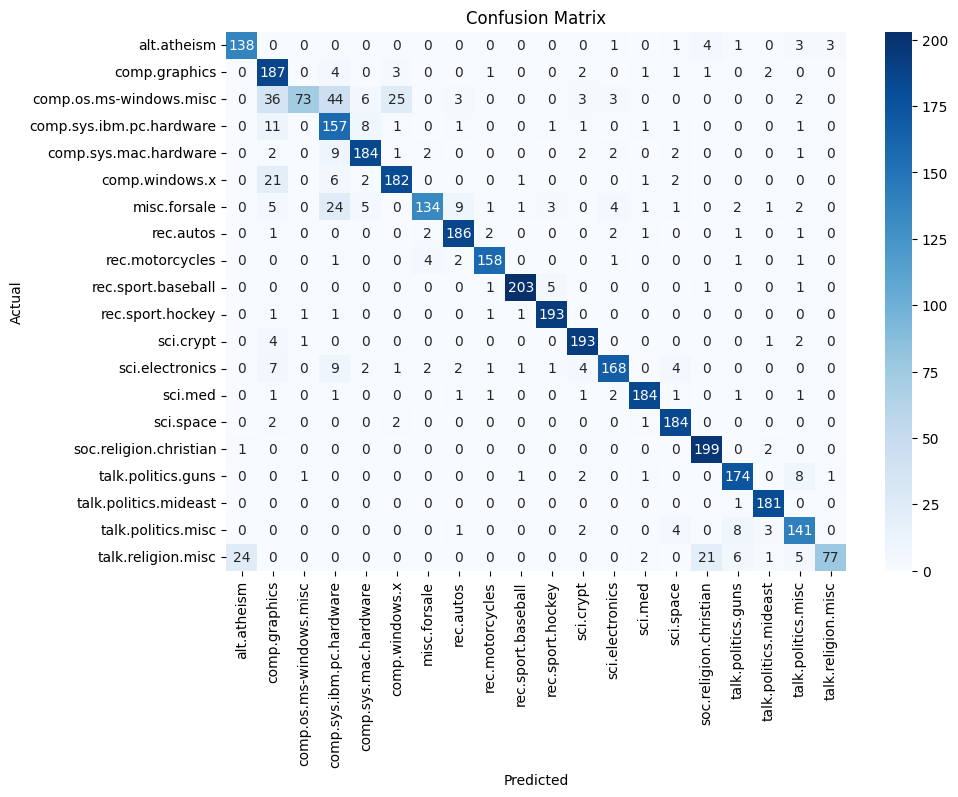

In [ ]:
# 2
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 加载20个新闻组数据集
newsgroups = fetch_20newsgroups(subset='all')

# # 查看类别标签
# print("类别标签：", newsgroups.target_names)

# # 查看数据集的描述
# print("数据集描述：", newsgroups.DESCR)

# # 查看样本数据
# print("数据样本：", newsgroups.data[:5])

# 将文本数据转换为词袋模型
vectorizer = CountVectorizer(stop_words='english')  # 移除常见的停用词
X = vectorizer.fit_transform(newsgroups.data)  # 文本数据转化为特征矩阵

# 获取标签数据
y = newsgroups.target

# 将数据集划分为训练集和测试集，测试集比例为20%，随机种子为42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建朴素贝叶斯分类器（Multinomial Naive Bayes）
nb_classifier = MultinomialNB()

# 训练分类器
nb_classifier.fit(X_train, y_train)

# 使用测试集进行预测
y_pred = nb_classifier.predict(X_test)

# 计算并输出各项评估指标
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 平均召回率，处理多分类问题
f1 = f1_score(y_test, y_pred, average='macro')  # 平均F1分数

# 输出评估结果
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


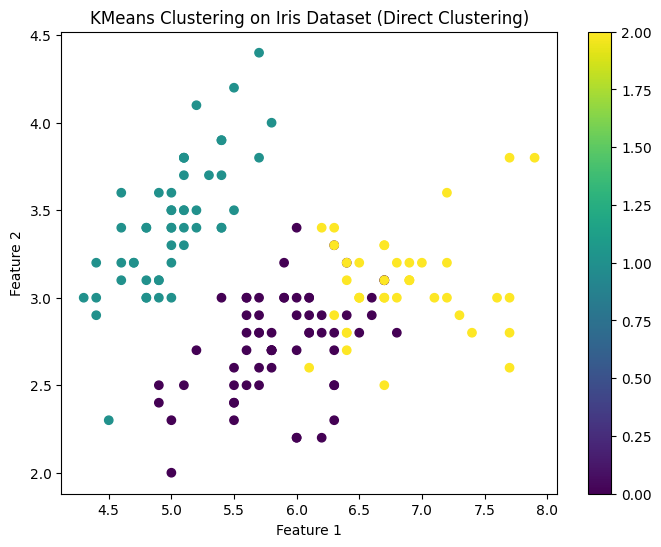

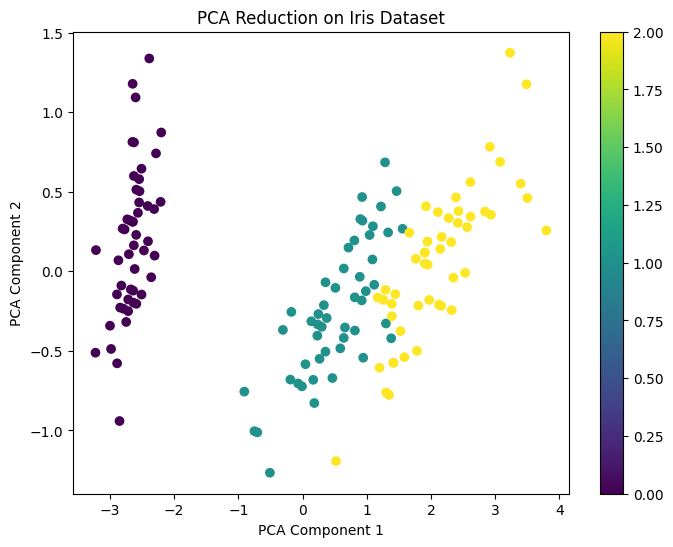

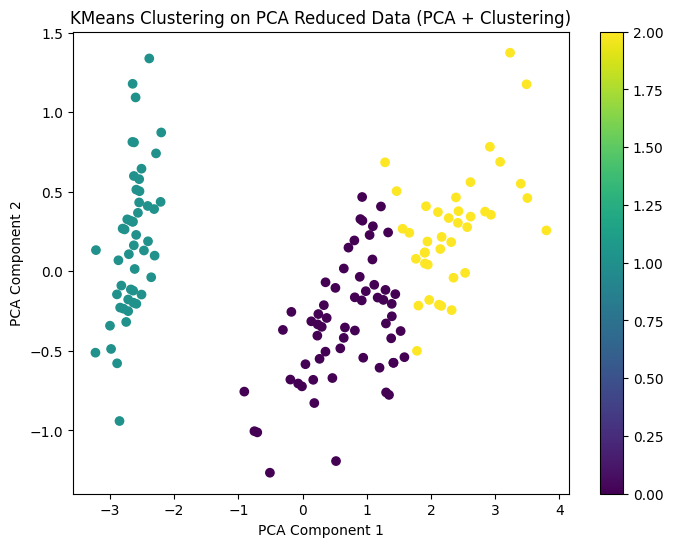

Silhouette Coefficient (Direct Clustering): 0.5511916046195917
Silhouette Coefficient (PCA + Clustering): 0.5976764219547991


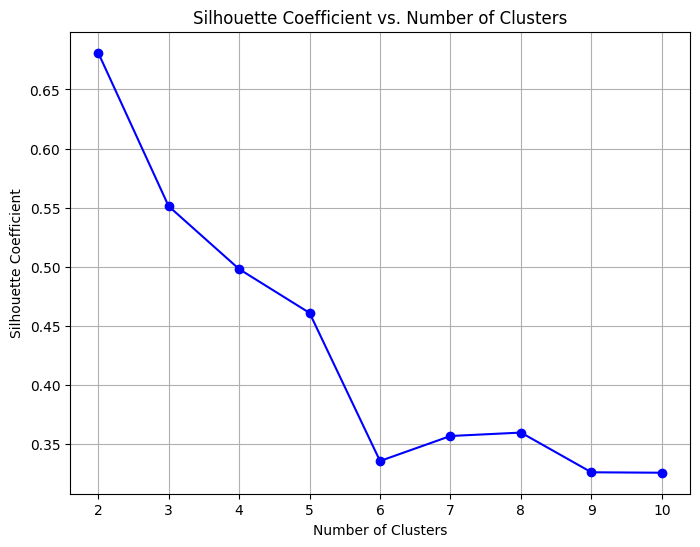

In [4]:
# 3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data  # 特征数据
y = iris.target  # 标签数据（对于聚类任务并不需要使用标签）

# 使用KMeans进行聚类，设置聚类数为3，随机种子为0
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# 获取聚类标签
labels = kmeans.labels_

# 可视化聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.title("KMeans Clustering on Iris Dataset (Direct Clustering)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar()
plt.show()

# 使用PCA将数据降维到2维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 可视化PCA降维后的结果
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', marker='o')
plt.title("PCA Reduction on Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.show()

# 使用KMeans进行聚类（降维后聚类）
kmeans_pca = KMeans(n_clusters=3, random_state=0)
kmeans_pca.fit(X_pca)

# 获取聚类标签
labels_pca = kmeans_pca.labels_

# 可视化降维后聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis', marker='o')
plt.title("KMeans Clustering on PCA Reduced Data (PCA + Clustering)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.show()

# 计算直接聚类的轮廓系数
silhouette_direct = silhouette_score(X, labels)

# 计算降维后聚类的轮廓系数
silhouette_pca = silhouette_score(X_pca, labels_pca)

# 输出轮廓系数
print("Silhouette Coefficient (Direct Clustering):", silhouette_direct)
print("Silhouette Coefficient (PCA + Clustering):", silhouette_pca)

# 设置聚类数的范围
cluster_range = range(2, 11)

# 存储不同聚类数的轮廓系数
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# 绘制轮廓系数与聚类数的关系图
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', color='b')
plt.title("Silhouette Coefficient vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.grid(True)
plt.show()
